##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##**Import the dataset**

In [ ]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


##**Understand the dataset**

In [ ]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 9994
Number of columns: 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Function to convert mixed date formats to 'dd-mm-yy'
def convert_date_format(date):
    try:
        return pd.to_datetime(date).strftime('%d-%m-%y')
    except Exception as e:
        print(f"Error converting date {date}: {e}")
        return None

# Apply the function to the 'Order Date' column
df['Order Date'] = df['Order Date'].apply(convert_date_format)

#Extract month from the order date
# Convert 'Order Date' back to datetime objects with the correct format before using .dt accessor
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year
df.head(30)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu,6,June,2015
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu,6,June,2015
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu,6,June,2015
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,6,June,2015
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu,6,June,2015


##**Customer Insights**

In [ ]:
# Group by City and count the number of customers
customer_distribution = df.groupby('City')['Customer Name'].nunique().reset_index()
customer_distribution.columns = ['city', 'Customer_count']
customer_distribution

,city,Customer_count
0,Bodi,50
1,Chennai,50
2,Coimbatore,50
3,Cumbum,50
4,Dharmapuri,50
5,Dindigul,50
6,Kanyakumari,50
7,Karur,50
8,Krishnagiri,50
9,Madurai,50


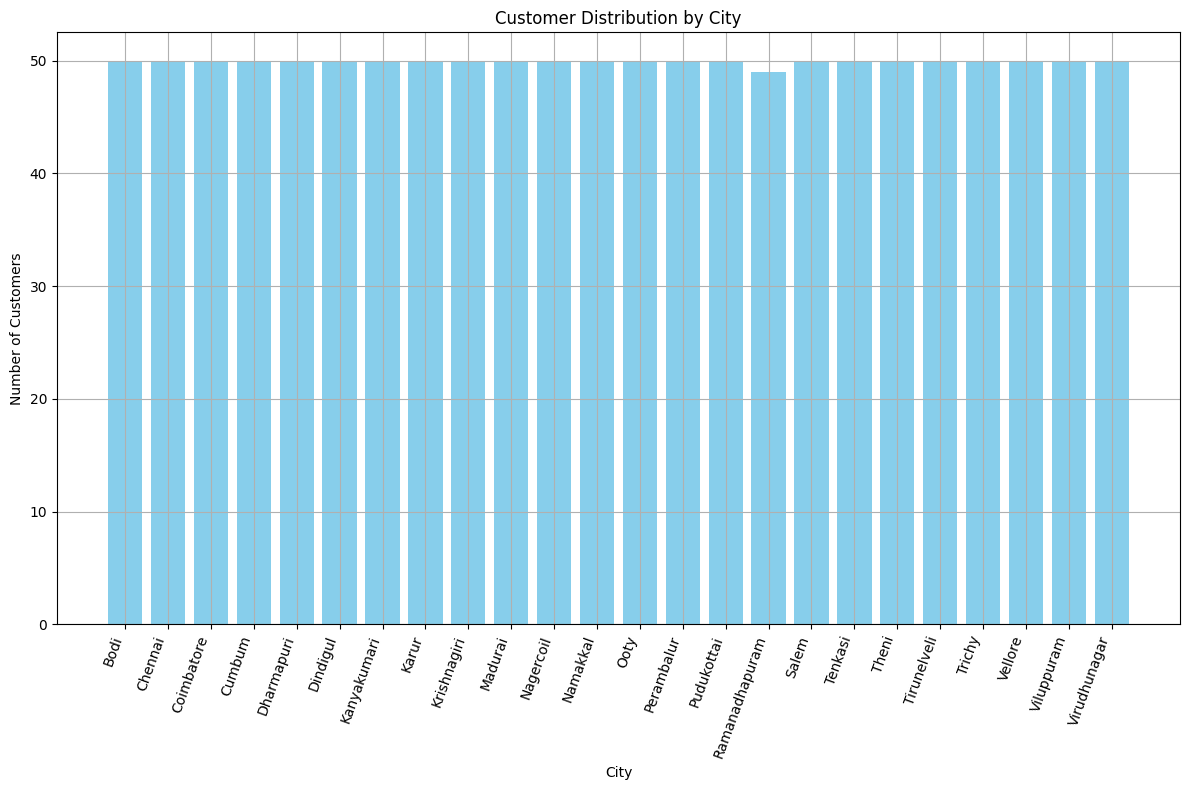

In [ ]:
# Plot the customer distribution
plt.figure(figsize=(12, 8))
plt.bar(customer_distribution['city'], customer_distribution['Customer_count'], color='skyblue')
plt.title('Customer Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=70, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

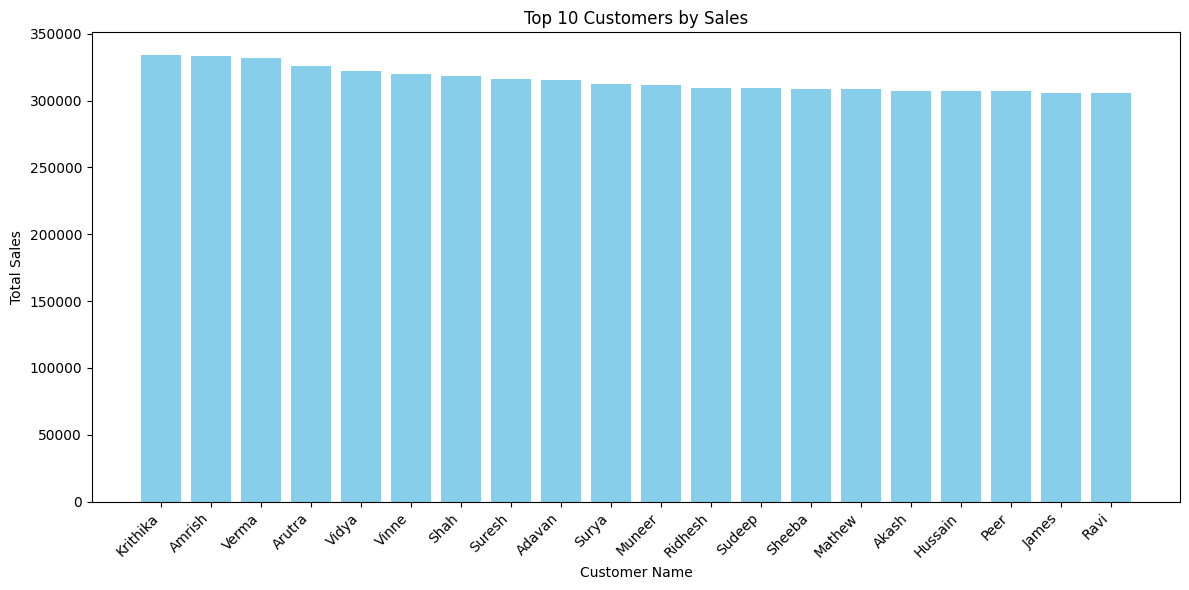

In [ ]:
# Group by Customer Name and calculate total sales
top_customers = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort by sales in descending order and select the top N customers (e.g., top 20)
top_customers = top_customers.sort_values(by=['Sales'], ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_customers['Customer Name'], top_customers['Sales'], color='skyblue')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##**Product Analysis**

##Top Selling Products

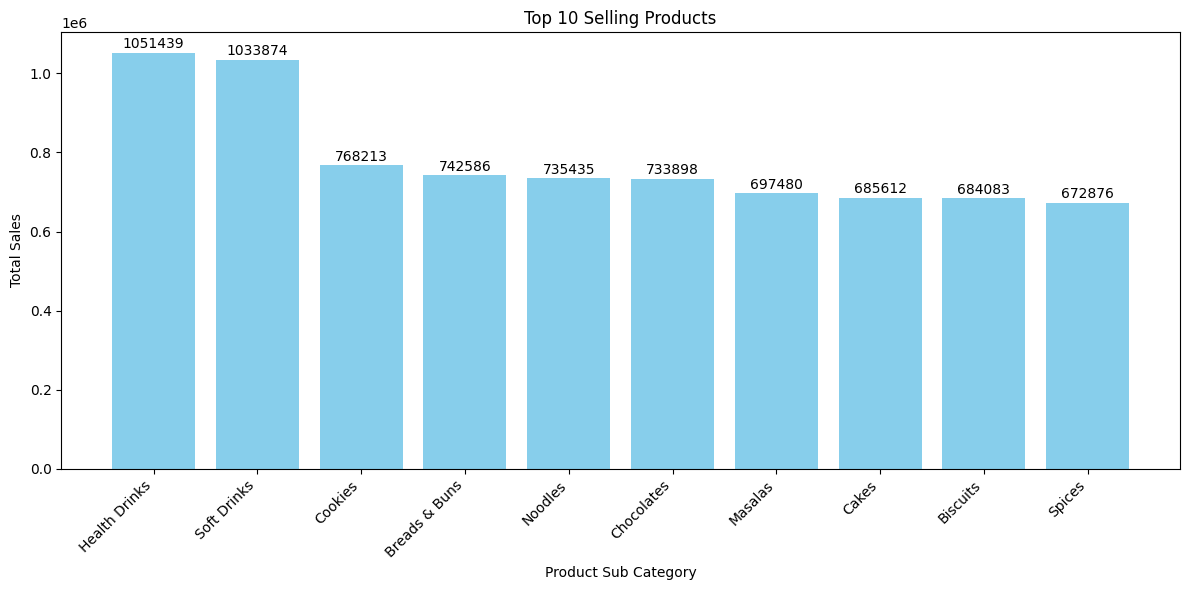

In [ ]:
# Group by Sub-Category and calculate total sales
top_selling_products = df.groupby('Sub Category')['Sales'].sum().reset_index()

# Sort by sales in descending order and select the top N products (e.g., top 10)
top_selling_products = top_selling_products.sort_values(by=['Sales'], ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_selling_products['Sub Category'], top_selling_products['Sales'], color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Sub Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom', color='black')
plt.show()

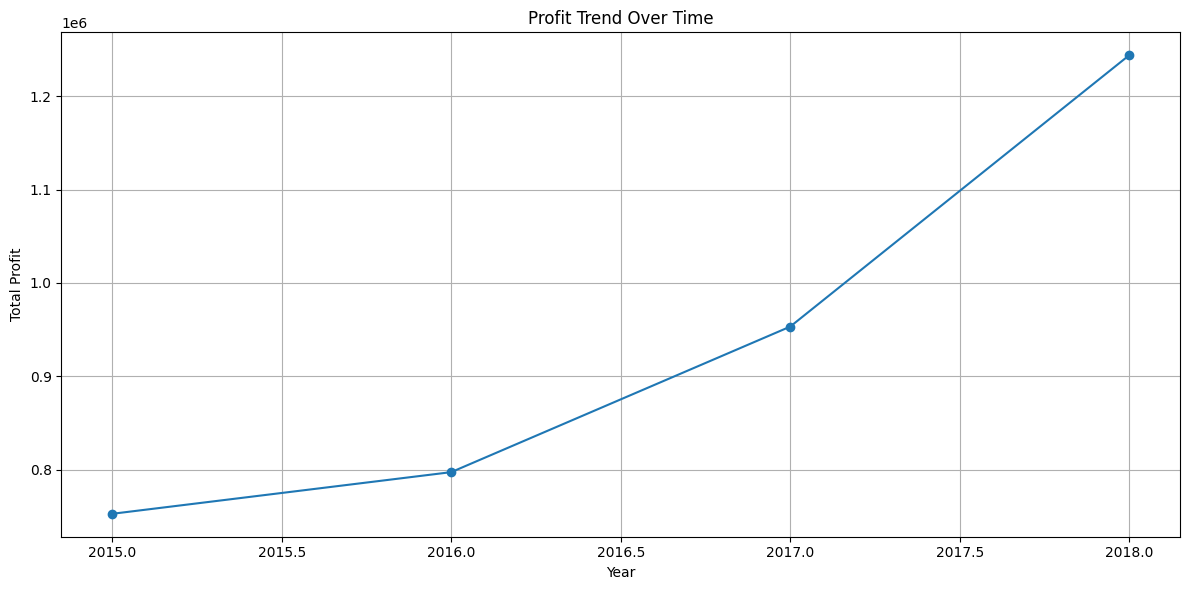

In [ ]:
# Group by 'Order Date' and calculate total profit for each date
profit_over_time = df.groupby('year')['Profit'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(profit_over_time['year'], profit_over_time['Profit'], marker='o', linestyle='-')
plt.title('Profit Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

##**Order Analysis**

##Order Distribution by Month

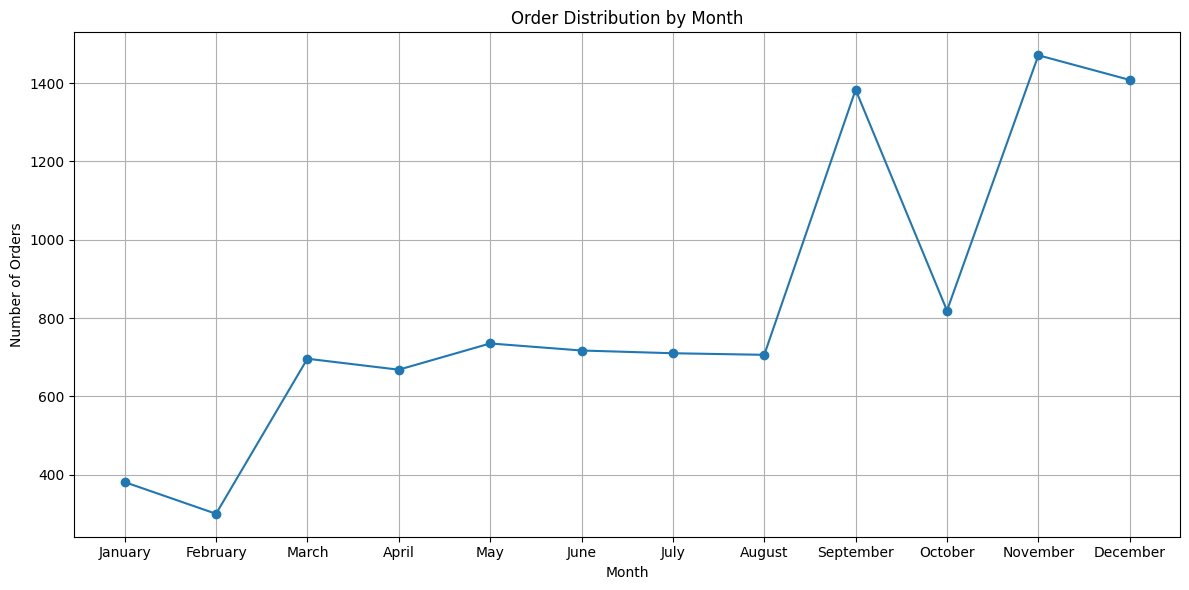

In [ ]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by 'Month' and count the number of orders for each date
order_distribution = df.groupby('Month')['Order ID'].count().reindex(month_order).reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(order_distribution['Month'], order_distribution['Order ID'], marker='o', linestyle='-')
plt.title('Order Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

##Order Distribution by Year

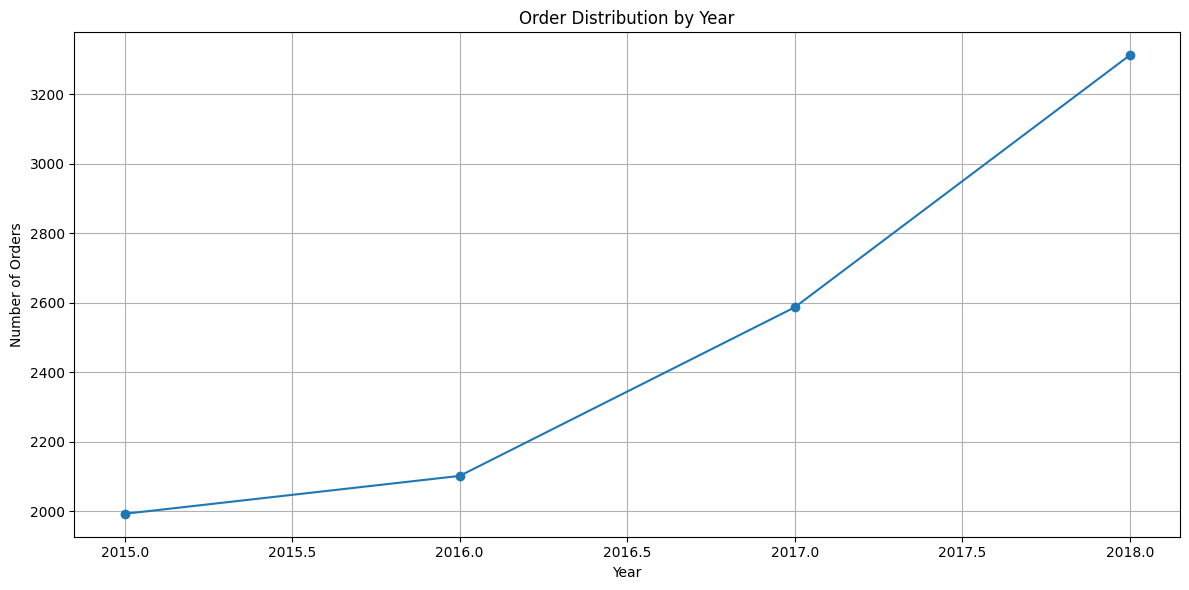

In [ ]:
# Group by 'Year' and count the number of orders for each date
order_distribution = df.groupby('year')['Order ID'].count().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(order_distribution['year'], order_distribution['Order ID'], marker='o', linestyle='-')
plt.title('Order Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

##Average Order Value over Time

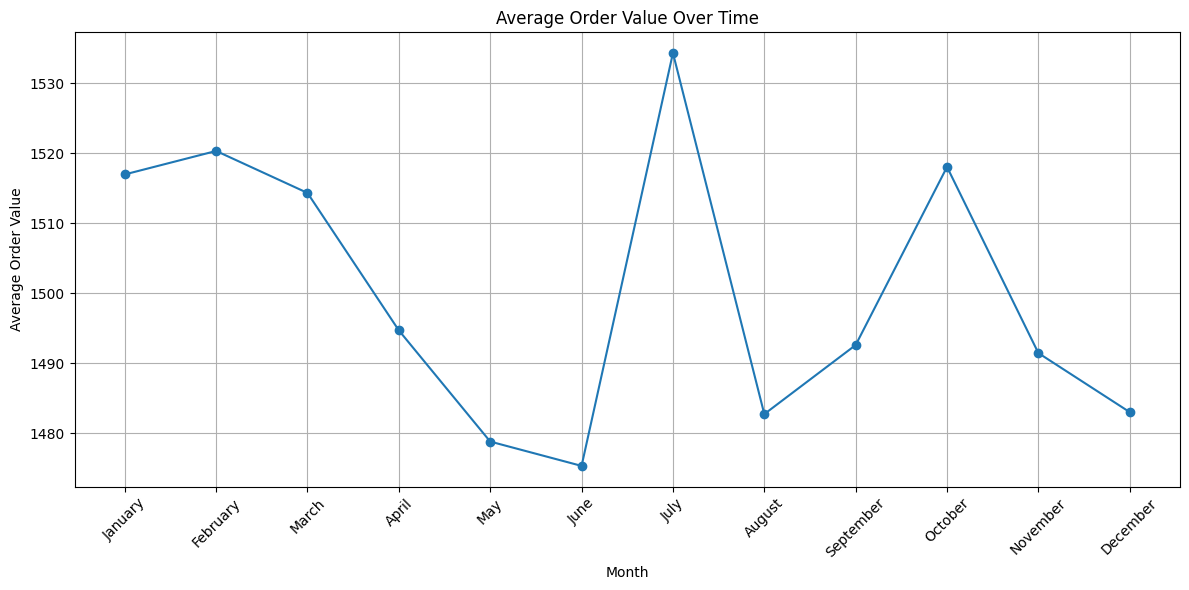

In [ ]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by 'Month' and calculate average order value for each month
average_order_value = df.groupby('Month')['Sales'].mean().reindex(month_order).reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(average_order_value['Month'], average_order_value['Sales'], marker='o', linestyle='-')
plt.title('Average Order Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##**Comparative Analysis**

##Sales vs. Profit By Category

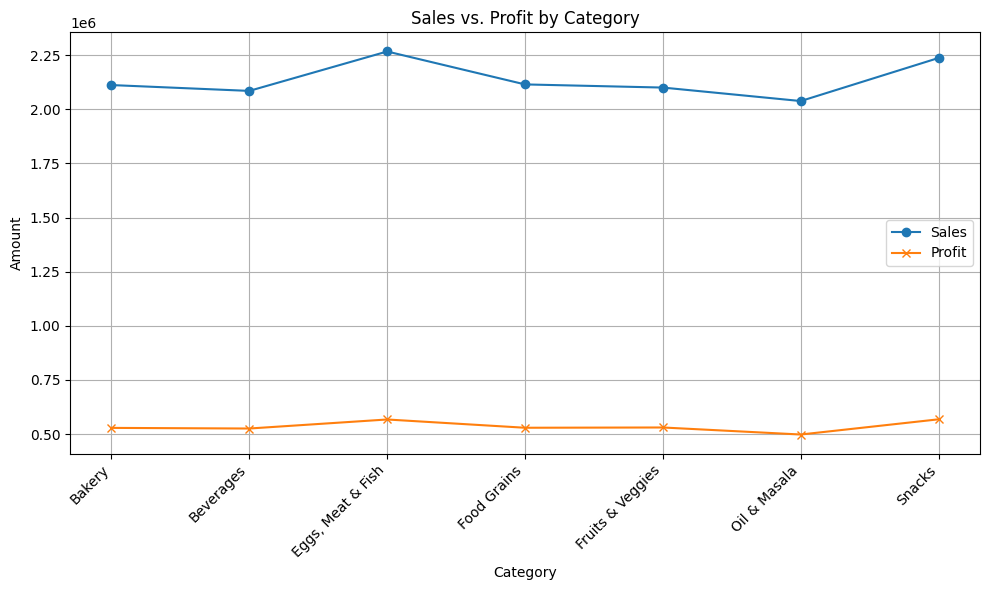

In [ ]:

# Group data and calculate total sales and profit
grouped_data = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Category'], grouped_data['Sales'], marker='o', label='Sales')
plt.plot(grouped_data['Category'], grouped_data['Profit'], marker='x', label='Profit')

plt.title('Sales vs. Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##**Sales Performance**

##Top 5 Cities By Sales

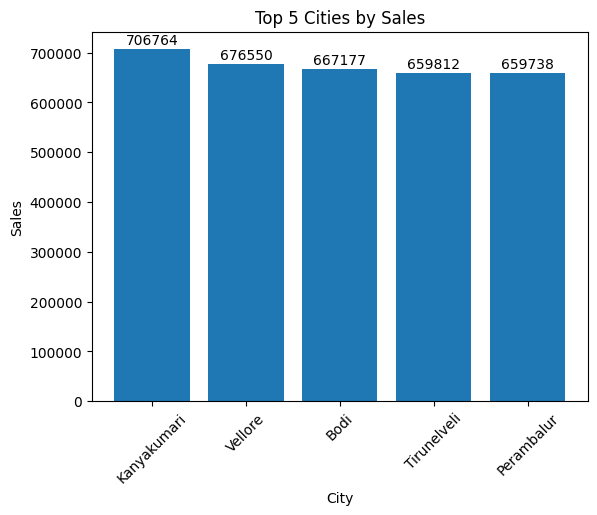

In [ ]:
#Extract relevant columns
city_sales = df[['City', 'Sales']]

#Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
sorted_cities = total_sales.sort_values(by='Sales', ascending=False)

#Select the top 5 cities
top_cities = sorted_cities.head(5)

#Plot the bar chart
bars = plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005*yval, round(yval, 2), ha='center', va='bottom', color='black')
plt.show()


##Sales By Year

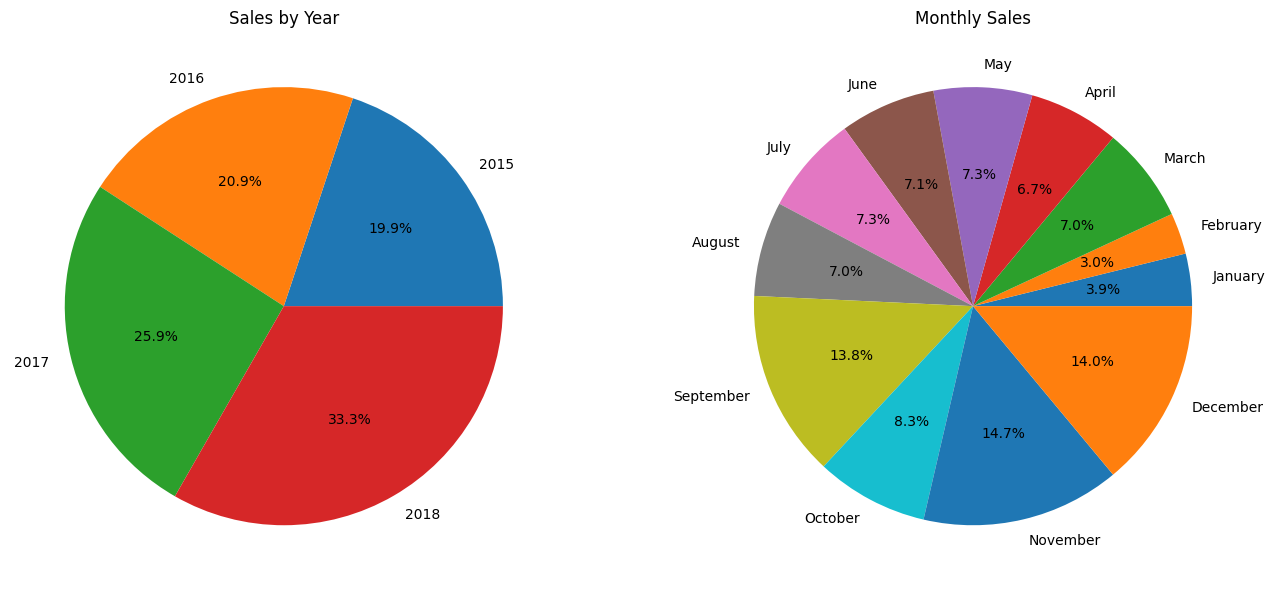

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Assuming your DataFrame has a column named 'Order Date'
Yearly_Sales = df.groupby("year")["Sales"].sum()
axs[0].pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%')
axs[0].set_title('Sales by Year')

# and you want to group by month extracted from 'Order Date'
Monthly_Sales = df.groupby("Month")["Sales"].sum()
# Reorder the months to ensure correct display in the pie chart
Monthly_Sales = Monthly_Sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

axs[1].pie(Monthly_Sales, labels=Monthly_Sales.index, autopct='%1.1f%%')
axs[1].set_title('Monthly Sales')

plt.tight_layout()
plt.show()

##Sales and Profit Trend By Year

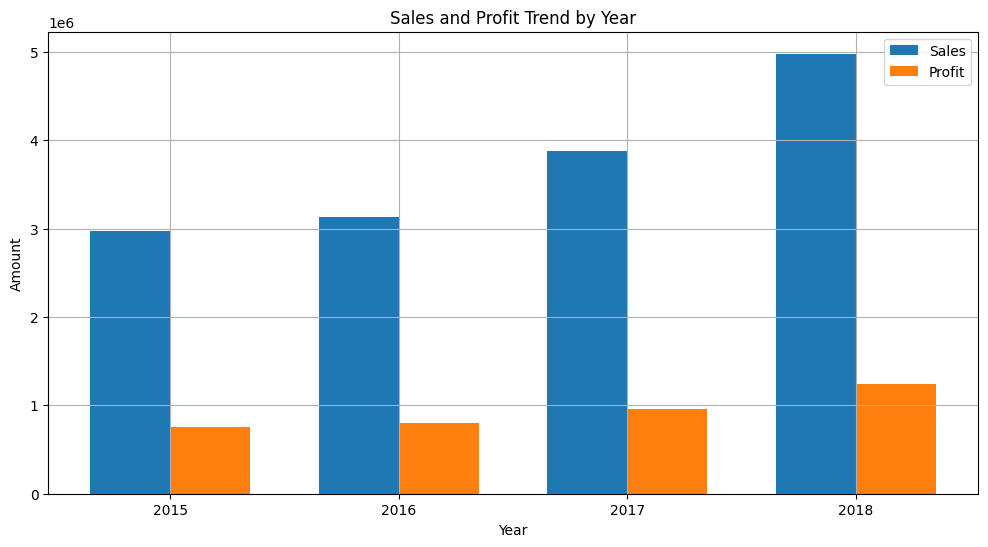

In [ ]:
# Group by year and sum sales and profit
yearly_data = df.groupby('year')[['Sales', 'Profit']].sum().reset_index()

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.35  # Width of the bars

ax.bar(yearly_data['year'] - width/2, yearly_data['Sales'], width, label='Sales')
ax.bar(yearly_data['year'] + width/2, yearly_data['Profit'], width, label='Profit')

# Customize plot
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Sales and Profit Trend by Year')
ax.legend()
ax.grid(True)

plt.xticks(yearly_data['year'])  # Set x-axis ticks to years

plt.show()

In [ ]:
# Create scatterplot of sales and profit
fig = px.scatter(df, x='Sales', y='Profit', title='Sales vs. Profit')
fig.show()

##Sales By Region

In [ ]:
# Create boxplot of sales by region
fig = px.box(df, x='Region', y='Sales', title='Sales by Region')
fig.show()

##Sales and Profit by Region

In [ ]:
# Calculate total sales and profit by region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Merge the two dataframes
sales_profit_by_region = pd.merge(sales_by_region, profit_by_region, on='Region')

# Display the results
sales_profit_by_region.head()

,Region,Sales,Profit
0,Central,3468156,856806.84
1,East,4248368,1074345.58
2,North,1254,401.28
3,South,2440461,623562.89
4,West,4798743,1192004.61


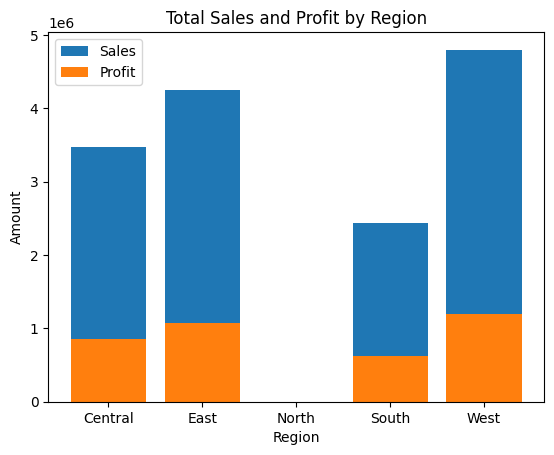

In [ ]:
# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Sales'], label='Sales')
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Profit'], label='Profit')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by Region')
ax.legend()

# Show the plot
plt.show()

##Sales and Profit by City

In [ ]:
# Calculate total sales and profit by city
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
profit_by_city = df.groupby('City')['Profit'].sum().reset_index()

# Merge the two dataframes
sales_profit_by_city = pd.merge(sales_by_city, profit_by_city, on='City')

# Display the results
sales_profit_by_city.head()

,City,Sales,Profit
0,Bodi,667177,173655.13
1,Chennai,634963,160921.33
2,Coimbatore,634748,157399.41
3,Cumbum,626047,156355.13
4,Dharmapuri,571553,141593.05


##Sales by Category and Sub Category

In [ ]:
# Calculate total sales by category and sub-category
category_sales = df.groupby(['Category', 'Sub Category'])['Sales'].sum().reset_index()

# Create bar chart of total sales by category
fig = px.bar(category_sales, x='Category', y='Sales', color='Sub Category', title='Total Sales by Category')
fig.show()

In [ ]:
# Create pie chart of total sales by sub-category
fig = px.pie(category_sales, values='Sales', names='Sub Category', title='Total Sales by Sub Category')
fig.show()

##**Profit by Category and Sub Category**

##Total Profit by Category

In [ ]:
# Calculate total profit by category and sub-category
category_profit = df.groupby(['Category', 'Sub Category'])['Profit'].sum().reset_index()

# Create bar chart of total profit by category
fig = px.bar(category_profit, x='Category', y='Profit', color='Sub Category', title='Total Profit by Category')
fig.show()

##Total Profit By Sub Category

In [ ]:
# Create pie chart of total profit by sub-category
fig = px.pie(category_profit, values='Profit', names='Sub Category', title='Total Profit by Sub Category')
fig.show()

##**Discount Analysis**

##Impact of Discounts on Sales

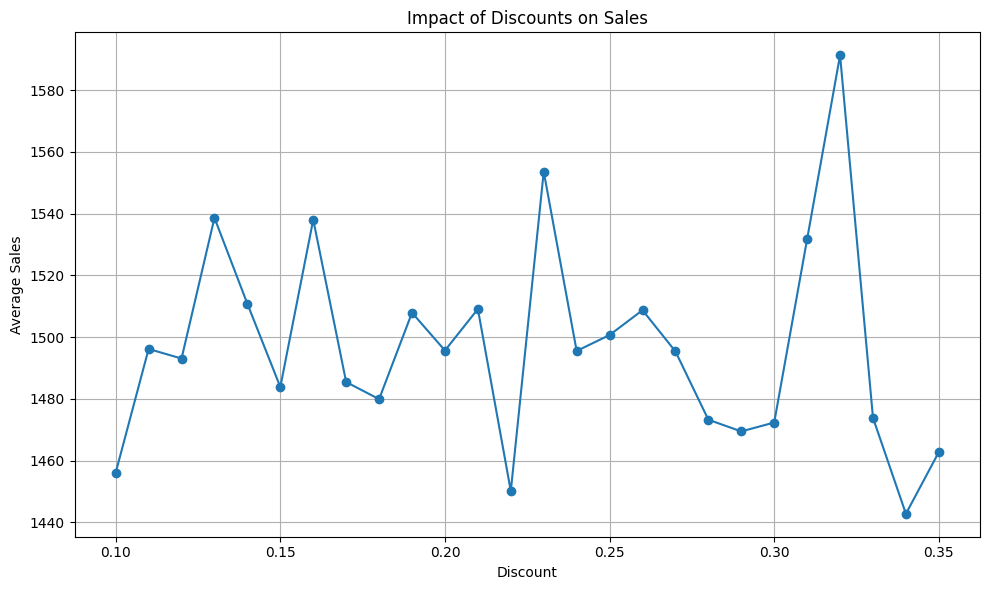

In [ ]:
# Group by Discount and calculate average sales for each discount level
discount_sales = df.groupby('Discount')['Sales'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(discount_sales['Discount'], discount_sales['Sales'], marker='o', linestyle='-')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

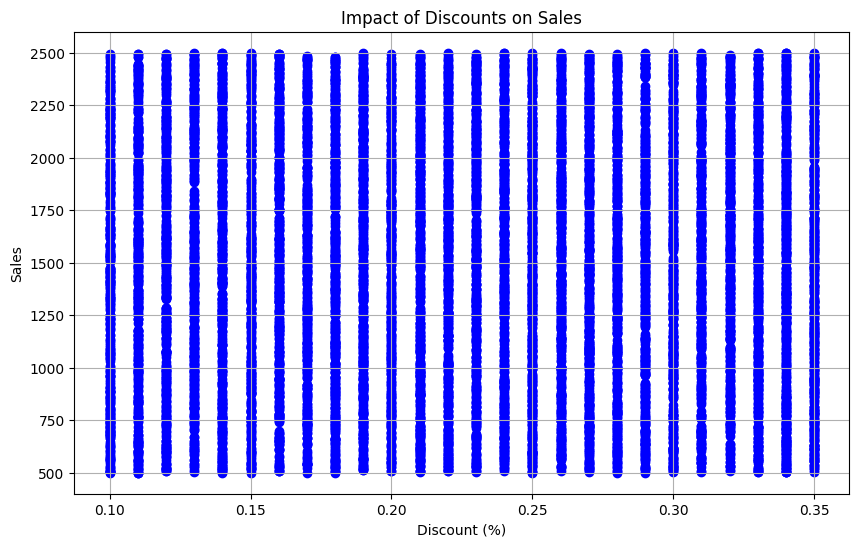

In [ ]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Sales'], color='blue')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Key Observations:

* Positive Trend: There is an upward trend in the scatter plot, indicating that higher discounts are generally associated with higher sales.

* Correlation: The positive correlation between discounts and sales suggests that as discount percentages increase, sales amounts also tend to increase.

* Distribution: The points are spread out, but the general pattern shows that higher discounts often result in higher sales values.

* **Effectiveness of Discounts: Higher discounts (30-40%) lead to significant sales increases**.

Analysis:

* Positive Correlation: The graph indicates that discounts effectively drive sales. Customers are more likely to make purchases when they perceive higher value due to discounts.

* Optimization: Retailers can use this information to optimize discount strategies, offering discounts that effectively drive sales without unnecessarily reducing profit margins.